# Satellitengeodäsie Übung 2

Im ersten Teil wird der Offset zweier VLBI Signalreihen mittels Korrelation bestimmt. Im zweiten Teil wird die Energie von SLR anhand von LAGEOS und einer weiteren, fiktiven Position des gleichen Reflektors auf mittlerer Monddistanz berechnet.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Task 1 VLBI


In [3]:
# Load data into df for calculations
signal = np.genfromtxt('./Data/Signalsasc.sec', delimiter = "	", names = True)

### Task 1.1 Korrelation


In [4]:
# Correlate the three datasets with same index (a_1 and b_1, a_2 and b_2 etc.)
correlations = [[],[],[]]

a_entries = ["a1", "a2", "a3"]
b_entries = ["b1", "b2", "b3"]
pairs = zip(a_entries, b_entries)

i = 0 

for a, b in pairs:
    correlations[i] = np.correlate(signal[a], signal[b], mode = "full")
    i += 1


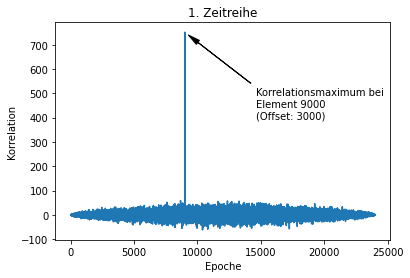

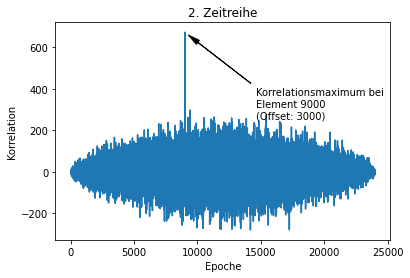

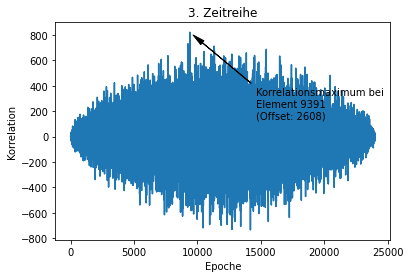

In [5]:
# Plot all correlations
i = 1

for correlation in correlations:
    fig, ax = plt.subplots()
    
    ax.annotate('Korrelationsmaximum bei \nElement ' + str(np.argmax(correlation) + 1) + "\n(Offset: " + str(abs(round(np.argmax(correlation) + 1 - len(correlation) / 2))) + ")", 
            xy=(np.argmax(correlation), correlation[np.argmax(correlation)]),  xycoords='data',
            xytext=(0.6, 0.7), textcoords='axes fraction',
            arrowprops=dict(headwidth = 5, width = 0.1, facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top',
            )

    plt.plot(range(1, len(correlation) + 1), correlation)
    plt.title(str(i) + '. Zeitreihe')
    plt.xlabel('Epoche')
    plt.ylabel('Korrelation')

    i += 1

#### Interpretation

Bei der Ersten Zeitreihe sehen ein ganz klares globales Maximum. Der Datensatz hat auch am wenigsten Rauschen, weshalb es Sinn macht, dass nur beim "passenden" Shift eine hohe Korrelation gefunden wird. Mit zunehmendem Rauschen (2. / 3. Reihe) wird es immer schwiereger eine klare Korrelation zu finden (bzw. unmöglich in der 3. Zeitreihe).

### Task 1.2 Faktoren zur Ermittlung der Zeitdifferenz
Zur Ermittlung des Shifts korrellieren wir die beiden Signalreihen. Faktoren mit Einfluss auf die *Korrelationsfähigkeit* haben also zusätzlich direkten Einfluss auf die Bestimmung. Dazu gehören:

- Die **Länge der Signalreihe** spielt eine grosse Rolle. Sind sie kurz, ist es schwierig eine hohe Korrelation zu finden. Je **länger** sie sind, desto besser (genauer und mit höherer Konfidenz) lässt es sich untersuchen.
- Wie wir oben gesehen haben, hat das **Rauschen** auch einen grossen Einfluss. In der 3. Zeitreihe wird ein anderer Offset gefunden als in den anderen Reihen. Auch ist das Maximum deutlich weniger distinkt. Je **grösser** das Rauschen, desto **kleiner** die Korrelation. Das Rauschen selbst hat verschiedene Ursachen. Eine **hohe Signalstärke** verringert das Signal-Rausch-Verhältnis und macht eine klare Korrelation möglich. Die Verstärkung des Signals kann da  Abhilfe schaffen. Mit einem **grossen Teleskop** wird mehr Energie der Quelle aufgefangen. Auch die Signalverarbeitung kann Rauschen hinzufügen (gescheit implementiert aber auch verringern).

Es gibt noch andere Faktoren, die die Signalreihen direkt beeinflussen (und damit indirekt auch die Korrelation). Zum Beispiel kann es sein, dass die Signalreihen unterschiedliche Abweichungen beeinhalten wegen verschiedener Messinstrumente oder Umweltparametern. Oder die Signale haben durch die unterschiedlichen Pfade andere Verzögerungen (Ionosphäre, Troposphähre). 

## Task 2


### Vorbereitung für Task 2


#### Konstanten


In [6]:
# Constants for task 2

# Distance between telescope and reflector in m
LR = 6000 * 1000 

# Distance to moon in m
LM = 384000 * 1000

# Diameter of reflector in m
DR = 3.8 / 100

# Diameter of receiveroptics i m
DT = 75 / 100

# Divergence of laser in radian
TS = 25 * 10**(-6)

# Divergence of the reflector in rad
TR = 34 * 10**(-6)

# Transmission energy in J
ES = 0.2

#### Oberflächen


In [7]:
# Surface of reflector
A_R = (DR / 2)**2 * math.pi


# Surface of receiver optics
A_T = (DT / 2)**2 * math.pi


# Illuminated surface reflector
A_t_S = (LR * TS / 2)**2 * math.pi


# Illuminated surface reflector on moon
A_t_SM = (LM * TS / 2)**2 * math.pi


# Illuminated surface at telescope after reflection at lageos
A_t_R = (LR * TR / 2)**2 * math.pi


# Illuminated surface at telescope after reflection on moon
A_t_RM = (LM * TR / 2)**2 * math.pi

### Task 2.1


In [8]:
# Energy at LAGEOS
E_R = A_R / A_t_S * ES

# Reflected energy from LAGEOS at telescope
E_T = A_T / A_t_R * E_R
print("Energie nach Reflektion bei LAGEOS:", "{:.3e}".format(E_T), "J")

# Energy at moon
EM_R = A_R / A_t_SM * ES

# Reflected energy from moon at telescope
EM_T = A_T / A_t_RM * EM_R
print("Energie nach Reflektion auf dem Mond:", "{:.3e}".format(EM_T), "J")

Energie nach Reflektion bei LAGEOS: 1.735e-13 J
Energie nach Reflektion auf dem Mond: 1.034e-20 J


### Task 2.2

Allgemein nimmt die Energie eines Strahlungskörpers umgekehrt proportional zum quadrierten Abstand ab (*Abstandsquadratgesetz*). Im vorliegenden Fall wird das Licht aber einmal reflektiert, weshalb es mit der Distanz in der 4. Potenz abnimmt. Auch ist die Divergenz des Strahles sehr klein (Laser), so dass mehr Energie der gesendeten Welle am Ziel ankommt. 
